In [1]:
from qiskit import *
from qiskit.visualization import *

In [121]:
def qram(lights_out):
    qc = QuantumCircuit(11)
    
    for index, item in enumerate(lights_out):
        if index == 0:
            # Address 00
            # Apply X gate to qubits with 0 value
            qc.x([0, 1])
            for i_index, value in enumerate(item):
                if value == 1:
                    qc.ccx(0, 1, i_index + 2)
            qc.x([0, 1])

        if index == 1:
            # Address 01
            qc.x(0)
            for i_index, value in enumerate(item):
                if value == 1:
                    qc.ccx(0, 1, i_index + 2)
            qc.x(0)

        if index == 2:
            # Address 10
            qc.x(1)
            for i_index, value in enumerate(item):
                if value == 1:
                    qc.ccx(0, 1, i_index + 2)
            qc.x(1)

        if index == 3:
            # Address 11
            for i_index, value in enumerate(item):
                if value == 1:
                    qc.ccx(0, 1, i_index + 2)

    
#     # Address 00
#     # Apply X gate to qubits with 0 value
#     qc.x([0, 1])
#     qc.ccx(0, 1, 2)
#     qc.ccx(0, 1, 3)
#     qc.ccx(0, 1, 4)
#     qc.ccx(0, 1, 8)
#     qc.x([0, 1])

#     # Address 01
#     qc.x(0)
#     qc.ccx(0, 1, 2)
#     qc.ccx(0, 1, 4)
#     qc.ccx(0, 1, 8)
#     qc.ccx(0, 1, 9)
#     qc.x(0)

#     # Address 10
#     qc.x(1)
#     qc.ccx(0, 1, 2)
#     qc.ccx(0, 1, 4)
#     qc.ccx(0, 1, 5)
#     qc.ccx(0, 1, 6)
#     qc.ccx(0, 1, 7)
#     qc.ccx(0, 1, 10)
#     qc.x(1)

#     # Address 11
#     qc.ccx(0, 1, 2)
#     qc.ccx(0, 1, 8)
    
    qram_gate = qc.to_gate()
    qram_gate.name = 'qRAM'
    
    return qram_gate

In [122]:
def flip_adjacent(qc):
#     flip_dict = {0: [0, 1, 3], 1: [0, 1, 2, 4], 2: [1, 2, 5], 3: [0, 3, 4, 6], 4: [1, 3, 4, 5, 7], 5: [2, 4, 5, 8], 6: [3, 6, 7], 7: [4, 6, 7, 8], 8: [5, 7, 8]}

    qc.cx(9, 0)
    qc.cx(9, 1)
    qc.cx(9, 3)
    
    qc.cx(10, 0)
    qc.cx(10, 1)
    qc.cx(10, 2)
    qc.cx(10, 4)
    
    qc.cx(11, 1)
    qc.cx(11, 2)
    qc.cx(11, 5)
    
    qc.cx(12, 0)
    qc.cx(12, 3)
    qc.cx(12, 4)
    qc.cx(12, 6)
    
    qc.cx(13, 1)
    qc.cx(13, 3)
    qc.cx(13, 4)
    qc.cx(13, 5)
    qc.cx(13, 7)
    
    qc.cx(14, 2)
    qc.cx(14, 4)
    qc.cx(14, 5)
    qc.cx(14, 8)
    
    qc.cx(15, 3)
    qc.cx(15, 6)
    qc.cx(15, 7)
    
    qc.cx(16, 4)
    qc.cx(16, 6)
    qc.cx(16, 7)
    qc.cx(16, 8)
    
    qc.cx(17, 5)
    qc.cx(17, 7)
    qc.cx(17, 8)

In [123]:
def oracle_P1():
    qc = QuantumCircuit(18)
    
    # Oracle
    qc.h(range(9, 18))

    flip_adjacent(qc)
    
    oracle_P1_gate = qc.to_gate()
    oracle_P1_gate.name = 'Oracle P1'
    
    return oracle_P1_gate

In [124]:
def oracle_P2():
    qc = QuantumCircuit(18)

    flip_adjacent(qc)
    
    qc.h(range(9, 18))
    
    oracle_P2_gate = qc.to_gate()
    oracle_P2_gate.name = 'Oracle P2'
    
    return oracle_P2_gate

In [125]:
def diffuser():
    qc = QuantumCircuit(2)
    
    qc.x(range(2))
    qc.cz(0, 1)
    qc.x(range(2))
    
    diffuser_gate = qc.to_gate()
    diffuser_gate.name = 'Diffuser'
    
    return diffuser_gate

In [144]:
def push_condition():
    # 9-qubit Adder
    qc = QuantumCircuit(16)

    qc.cx(0, 9)
    qc.cx(1, 9)
    qc.cx(2, 9)    # 9 is S1
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.ccx(2, 1, 0)    # 0 is C1

    qc.cx(3, 10)
    qc.cx(4, 10)
    qc.cx(5, 10)    # 10 is S2
    qc.cx(3, 4)
    qc.cx(3, 5)
    qc.ccx(5, 4, 3)    # 3 is C2

    qc.cx(6, 11)
    qc.cx(7, 11)
    qc.cx(8, 11)    # 11 is S3
    qc.cx(6, 7)
    qc.cx(6, 8)
    qc.ccx(8, 7, 6)    # 6 C3

    qc.cx(9, 12)
    qc.cx(10, 12)
    qc.cx(11, 12)    # 12 is final S
    qc.cx(9, 10)
    qc.cx(9, 11)
    qc.ccx(11, 10, 9)    # 9 is SC


    qc.cx(0, 13)
    qc.cx(3, 13)
    qc.cx(6, 13)    # 13 is CS'
    qc.cx(0, 3)
    qc.cx(0, 6)
    qc.ccx(6, 3, 0)

    qc.cx(9, 14)
    qc.cx(13, 14)    # 14 is CF1
    qc.cx(0, 9)
    qc.cx(0, 13)
    qc.ccx(13, 9, 0)    # 0 is CC and CF2-dash (not complete CF2)

    qc.x(0)
#     qc.ccx(12, 14, 15)
#     qc.mcx([0, 12, 14], 15)    # 15 is Ancilla which adds a negative phase!   
    qc.cx(0, 15)
    qc.x(0)
    
    # Push Dagger
    qc.ccx(13, 9, 0)    # 0 is CC and CF2-dash (not complete CF2)
    qc.cx(0, 13)
    qc.cx(0, 9)
    qc.cx(13, 14)    # 14 is CF1
    qc.cx(9, 14)
    
    qc.ccx(6, 3, 0)
    qc.cx(0, 6)
    qc.cx(0, 3)
    qc.cx(6, 13)    # 13 is CS'
    qc.cx(3, 13)
    qc.cx(0, 13)
    
    qc.ccx(11, 10, 9)    # 9 is SC
    qc.cx(9, 11)
    qc.cx(9, 10)
    qc.cx(11, 12)    # 12 is final S
    qc.cx(10, 12)
    qc.cx(9, 12)
    
    qc.ccx(8, 7, 6)    # 6 C3
    qc.cx(6, 8)
    qc.cx(6, 7)
    qc.cx(8, 11)    # 11 is S3
    qc.cx(7, 11)
    qc.cx(6, 11)
    
    qc.ccx(5, 4, 3)    # 3 is C2
    qc.cx(3, 5)
    qc.cx(3, 4)
    qc.cx(5, 10)    # 10 is S2
    qc.cx(4, 10)
    qc.cx(3, 10)
    
    qc.ccx(2, 1, 0)    # 0 is C1
    qc.cx(0, 2)
    qc.cx(0, 1)
    qc.cx(2, 9)    # 9 is S1
    qc.cx(1, 9)
    qc.cx(0, 9)

    push_gate = qc.to_gate()
    push_gate.name = '3 Push Condition'
    
    return push_gate

In [148]:
def main(lights_out):
#     address = QuantumRegister(2)

#     # n+n+1 for including lights_output and ancilla
#     data = QuantumRegister(19)    # For data values upto 2**n, where n is 3. E.g storing number 8.
#     # lights = QuantumCircuit(9)
#     cr = ClassicalRegister(11)

#     qc = QuantumCircuit(address, data, cr)

    qc = QuantumCircuit(27, 2)
    
    # Prepare Addresses. 
    # Use Hadamard for superposition of 2 address qubits into 4 addresses.
    qc.h([0, 1])
    
    r = 1
    
    while(r>0):
        # qRAM
        qram_gate = qram(lights_out)
        qc.append(qram_gate, range(11))

        # Oracle_P1
        oracle_P1_gate = oracle_P1()
        qc.append(oracle_P1_gate, range(2, 20))
        
        qc.x(26)
        qc.h(26)    # for ancilla
        
        # 3 push condition
        push_gate = push_condition()
        qc.append(push_gate, range(11, 27))
        
        qc.h(26)
        
        # Oracle_P2
        oracle_P2_gate = oracle_P2()
        qc.append(oracle_P2_gate, range(2, 20))

        # qRAM
        qram_gate = qram(lights_out)
        qc.append(qram_gate, range(11))

        # Diffuser
        diffuser_gate = diffuser()
        qc.append(diffuser_gate, range(2))
        
        r = r-1
            
    # Measure
    qc.barrier()
    qc.measure([1, 0], range(2))
#     qc.measure([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], range(11))
      
    return qc

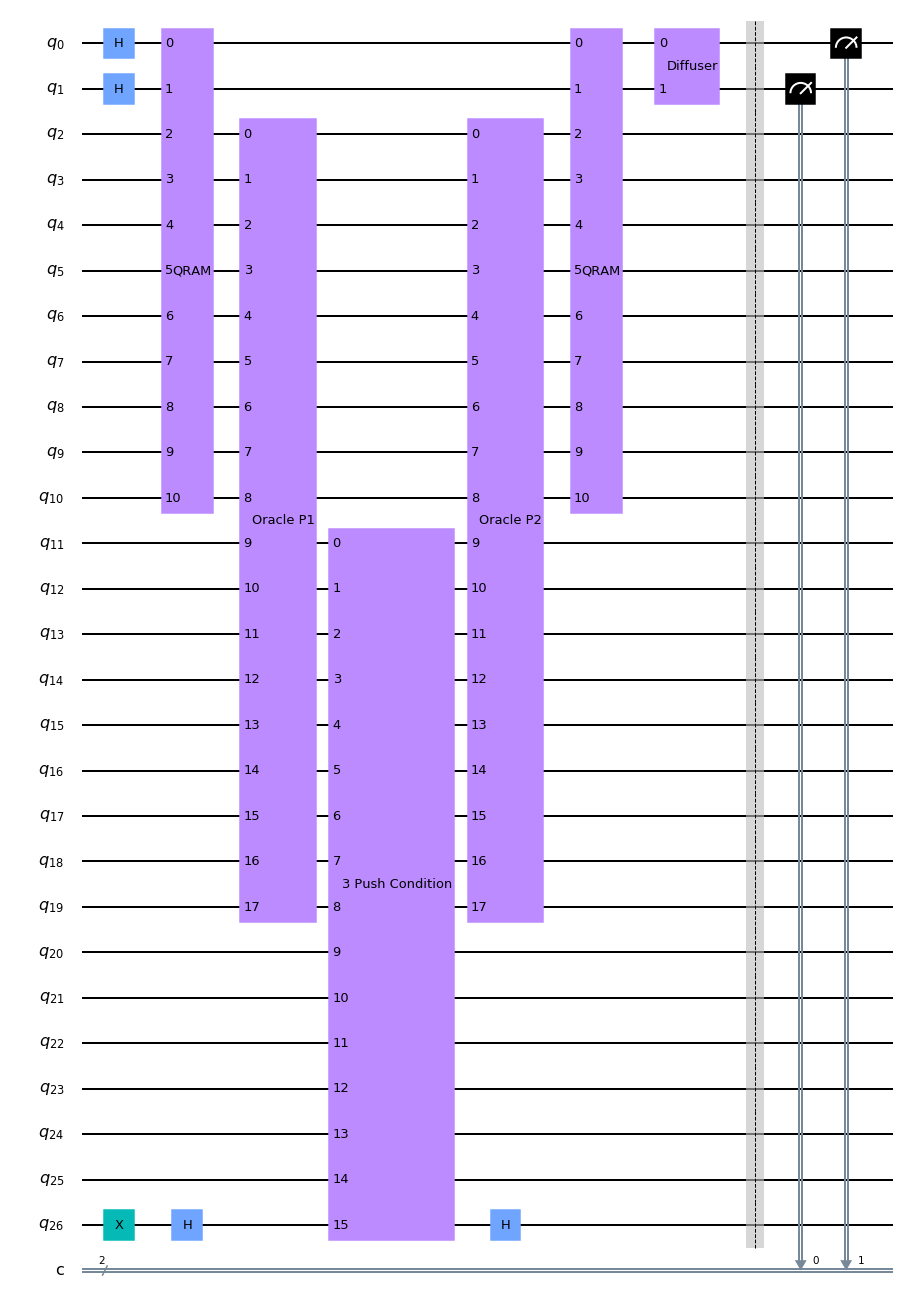

In [149]:
lights_out=[[1, 1, 1, 0, 0, 0, 1, 0, 0],[1, 0, 1, 0, 0, 0, 1, 1, 0],[1, 0, 1, 1, 1, 1, 0, 0, 1],[1, 0, 0, 0, 0, 0, 1, 0, 0]]

qc = main(lights_out)
qc.draw('mpl')

{'00': 1975, '01': 2092, '10': 2085, '11': 2040}


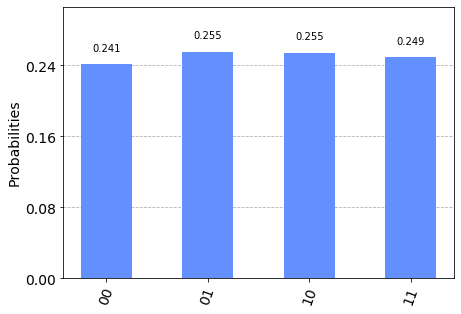

In [150]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 8192).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)

# 9-qubit Adder

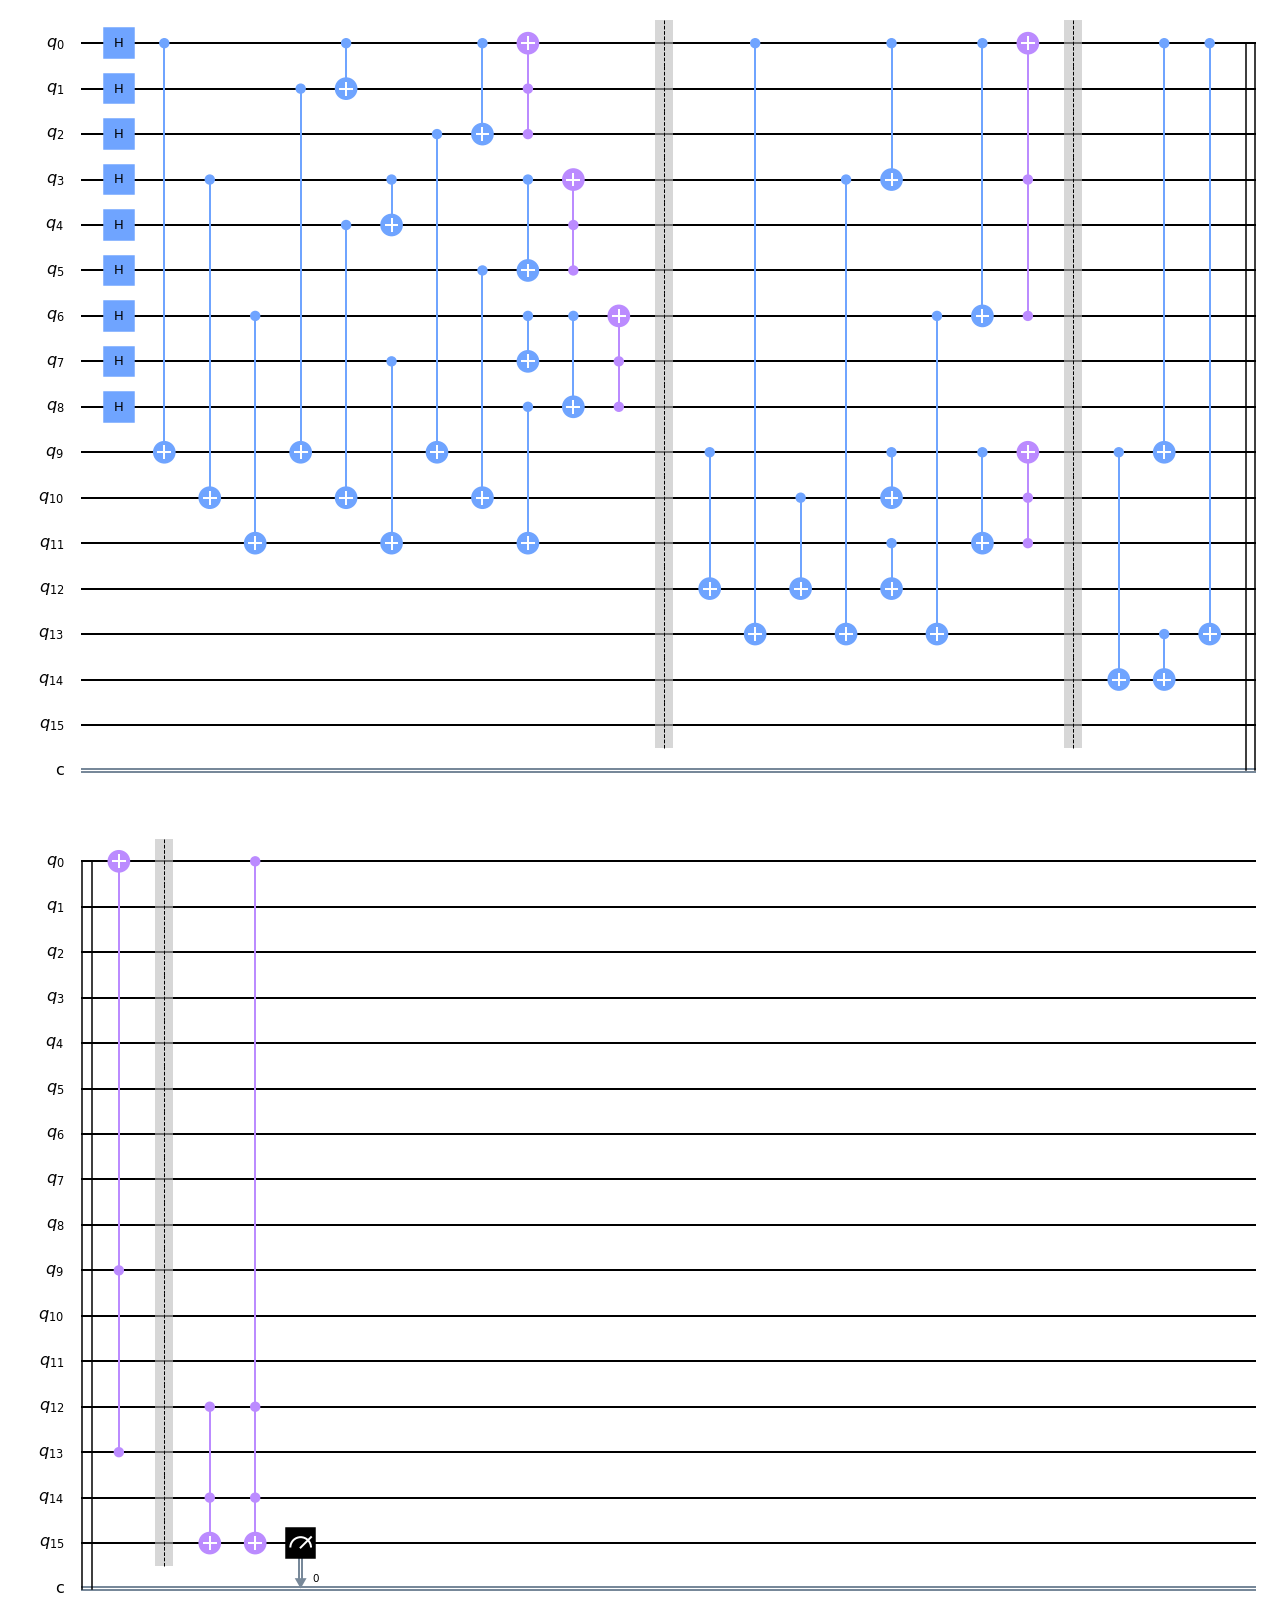

In [80]:
# 9-qubit Adder
qc = QuantumCircuit(16, 1)

qc.h(range(9))

qc.cx(0, 9)
qc.cx(1, 9)
qc.cx(2, 9)    # 9 is S1
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(2, 1, 0)    # 0 is C1


qc.cx(3, 10)
qc.cx(4, 10)
qc.cx(5, 10)    # 10 is S2
qc.cx(3, 4)
qc.cx(3, 5)
qc.ccx(5, 4, 3)    # 3 is C2


qc.cx(6, 11)
qc.cx(7, 11)
qc.cx(8, 11)    # 11 is S3
qc.cx(6, 7)
qc.cx(6, 8)
qc.ccx(8, 7, 6)    # 6 C3


qc.barrier()

qc.cx(9, 12)
qc.cx(10, 12)
qc.cx(11, 12)    # 12 is final S
qc.cx(9, 10)
qc.cx(9, 11)
qc.ccx(11, 10, 9)    # 9 is SC


qc.cx(0, 13)
qc.cx(3, 13)
qc.cx(6, 13)    # 13 is CS'
qc.cx(0, 3)
qc.cx(0, 6)
qc.ccx(6, 3, 0)


qc.barrier()

qc.cx(9, 14)
qc.cx(13, 14)    # 14 is CF1
qc.cx(0, 9)
qc.cx(0, 13)
qc.ccx(13, 9, 0)    # 0 is CC and CF2-dash (not complete CF2)


qc.barrier()

qc.ccx(12, 14, 15)
qc.mcx([0, 12, 14], 15)

qc.measure(15, 0)

qc.draw('mpl')

{'0': 877, '1': 147}


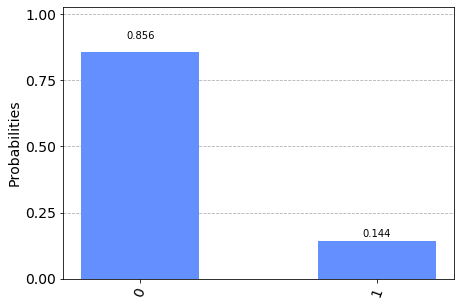

In [81]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots = 1024).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)